<a href="https://colab.research.google.com/github/ram130849/Deep_Learning_Systems_Assignments/blob/main/TensorFlow/Ramki/E533_DLS_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.2


In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
gpus = tf.config.list_physical_devices('GPU')
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
print("Training Data:",x_train.shape)
print("Training Label Data:",y_train.shape)
print("Testing Data:",x_test.shape)
print("Testing Label Data:",y_test.shape)

Training Data: (60000, 28, 28)
Training Label Data: (60000,)
Testing Data: (10000, 28, 28)
Testing Label Data: (10000,)


In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(1024,activation='relu'),
  tf.keras.layers.Dense(1024,activation='relu'),
  tf.keras.layers.Dense(1024,activation='relu'),
  tf.keras.layers.Dense(10)
])

In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 10)                10250     
                                                                 
Total params: 3,962,890
Trainable params: 3,962,890
Non-

In [9]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-20.724386 ,  42.388138 ,  27.516235 ,  12.555248 , -34.474182 ,
          7.1779633,   7.527556 ,   1.4600401, -48.19338  ,  33.711315 ]],
      dtype=float32)

In [10]:
tf.nn.softmax(predictions).numpy()

array([[3.8949697e-28, 9.9982917e-01, 3.4764872e-07, 1.1057743e-13,
        4.1595318e-34, 5.1090635e-16, 7.2471636e-16, 1.6791105e-18,
        0.0000000e+00, 1.7046279e-04]], dtype=float32)

In [11]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics="acc")

In [13]:
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=128)

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0487 - acc: 0.9871
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0529 - acc: 0.9859
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0435 - acc: 0.9883
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0408 - acc: 0.9899
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0442 - acc: 0.9891
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0420 - acc: 0.9894
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0400 - acc: 0.9903
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0511 - acc: 0.9876
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0342 - acc: 0.9916
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0340 - acc: 0.9916
Epoch 11/20
469/469 [============================

In [16]:
history.history

{'loss': [0.048729851841926575,
  0.05289432033896446,
  0.043549880385398865,
  0.040810760110616684,
  0.04422936961054802,
  0.0420101098716259,
  0.03999977931380272,
  0.05105769634246826,
  0.03424585238099098,
  0.03403783217072487,
  0.02580876462161541,
  0.03041781857609749,
  0.03581390902400017,
  0.034630242735147476,
  0.03184490278363228,
  0.02668096497654915,
  0.026098014786839485,
  0.02486620657145977,
  0.03282051533460617,
  0.02401917614042759],
 'acc': [0.9871000051498413,
  0.9859166741371155,
  0.9883333444595337,
  0.9899333119392395,
  0.9890999794006348,
  0.9894333481788635,
  0.9902999997138977,
  0.9875500202178955,
  0.9915666580200195,
  0.9915666580200195,
  0.9938499927520752,
  0.9925500154495239,
  0.9924666881561279,
  0.9924333095550537,
  0.9927499890327454,
  0.9940500259399414,
  0.9943666458129883,
  0.9950500130653381,
  0.9936666488647461,
  0.9947999715805054]}

In [17]:
test_loss,test_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2636 - acc: 0.9752


In [18]:
print(test_acc)

0.9751999974250793


In [19]:
# evaluate the model
y_pred =  tf.nn.softmax(model.predict(x_test))[:1000]

In [20]:
y_pred = y_pred.numpy().argmax(axis=1)

In [21]:
y_pred[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [22]:
result = np.where(y_pred == 8)
print(result[0].shape)

(88,)


In [23]:
confusion_matrix(y_test[:1000], y_pred)

array([[ 85,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 125,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0,   3, 106,   1,   0,   0,   1,   4,   0,   1],
       [  0,   0,   0, 106,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0,   0, 105,   0,   1,   0,   0,   4],
       [  0,   0,   0,   1,   1,  83,   0,   0,   2,   0],
       [  1,   0,   0,   0,   0,   0,  86,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0,  98,   0,   0],
       [  0,   0,   2,   1,   1,   0,   0,   0,  84,   1],
       [  0,   0,   0,   0,   1,   0,   0,   0,   1,  92]])

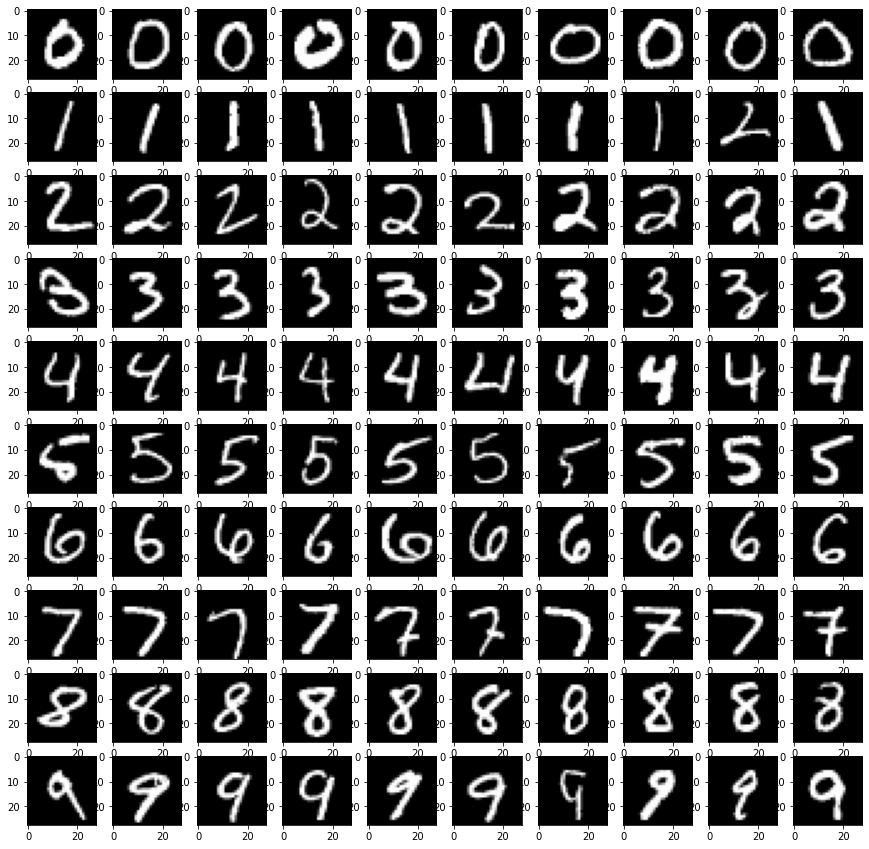

In [24]:
fig, axs = plt.subplots(10, 10, figsize=(15, 15))
for i in range(10):  
    result = np.where(y_pred == i)
    for j in range(10):
      axs[i,j].imshow(x_test[result[0][:10][j]], cmap=plt.get_cmap('gray'))
plt.show()

In [15]:
total_idx = np.array(range(0,len(x_test)))
random_idxs = np.random.choice(a=total_idx,size=1000,replace=False)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[]

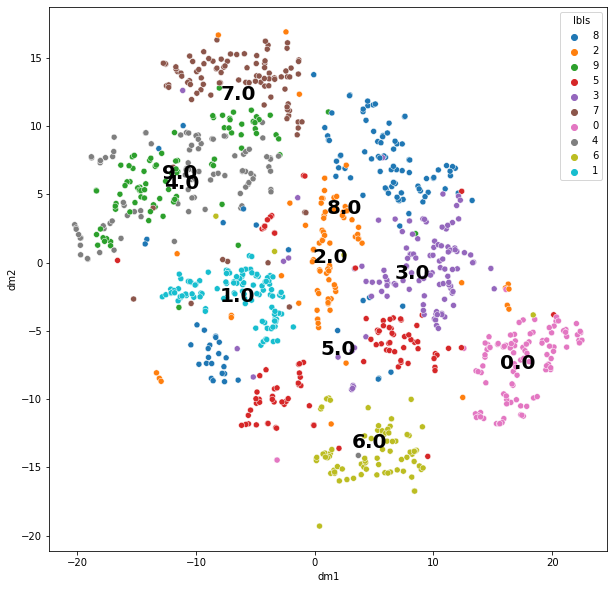

In [69]:
test_imgs = x_test[random_idxs]
test_labels = y_test[random_idxs]

#Applying TSNE transformation
test_2d_tsne = TSNE(n_components=2, n_iter=300).fit_transform(test_imgs.reshape([1000,28*28]))
df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_tsne,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid = df_centroid.sort_values(by="lbls",ascending=True)

plt.figure(figsize=(10,10))
sc_plot = sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

[]

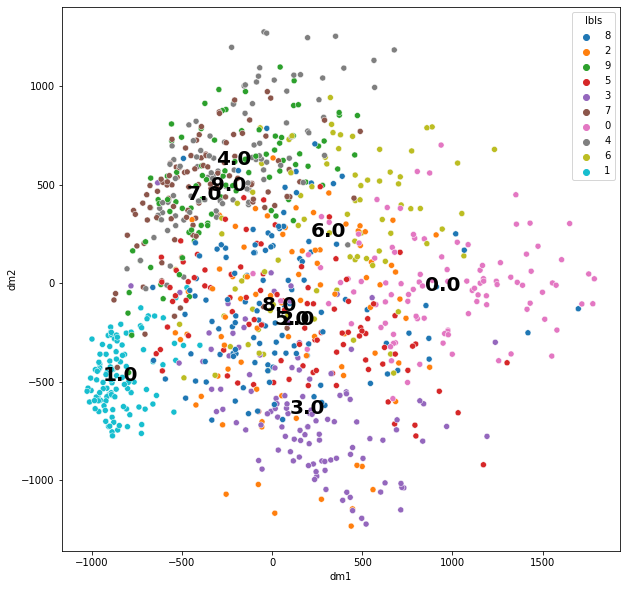

In [72]:
#Applying pca transformation
test_2d_pca = PCA(n_components=2).fit_transform(test_imgs.reshape([1000,28*28]))

df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_pca,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid.sort_values(by="lbls",ascending=True,inplace=True)

plt.figure(figsize=(10,10))
sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(0,10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

In [76]:
print(model.layers)
model.layers[1]

[<keras.layers.core.flatten.Flatten object at 0x7fcdd00b0590>, <keras.layers.core.dense.Dense object at 0x7fce4eb7e710>, <keras.layers.core.dense.Dense object at 0x7fcdd00b8950>, <keras.layers.core.dense.Dense object at 0x7fcdd00b8d90>, <keras.layers.core.dense.Dense object at 0x7fcdd98d79d0>, <keras.layers.core.dense.Dense object at 0x7fcdd0045450>]
